In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [102]:
df = pd.read_csv("DSB_Day1_Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [105]:
df = df.drop(columns=['PassengerId'])

# Id можно сразу убрать, это просто порядковый номер в df

In [106]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
df['Name'] = df['Name'].map(lambda x: re.sub(r".*(M[A-z]*\.|Dr.).*", r"\1", x))

# Убираем всё имя, кроме 'Mr.', 'Mrs.', 'Miss.', '', 'Dr.', 'Mme.', 'Ms.', 'Mlle.'

In [108]:
df['Name'] = df['Name'].apply(lambda x: '' if len(x) > 5 else x) # заменяем длинные имена, из которых не получилось достать статус на пустые строки

In [109]:
df['Name'].unique()

array(['Mr.', 'Mrs.', 'Miss.', '', 'Dr.', 'Mme.', 'Ms.', 'Mlle.', 'Dra'],
      dtype=object)

# Возможно, порт сильно влияет на шансы

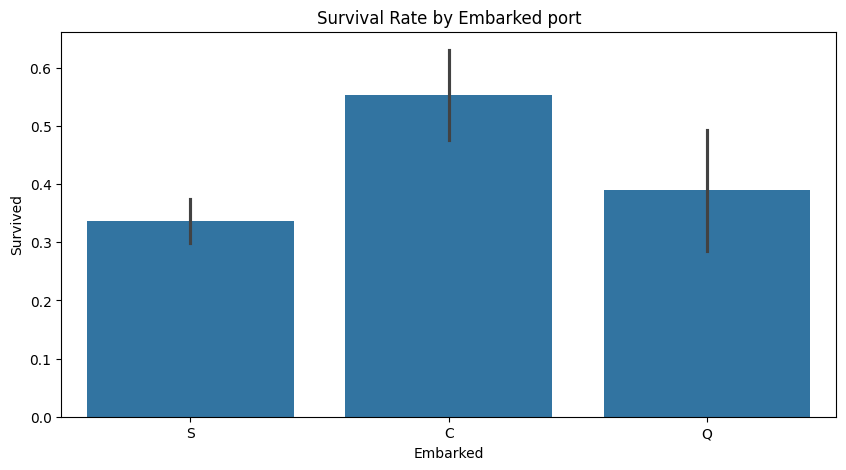

In [110]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarked port')
plt.show()

In [111]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

У людей, севших в порте С больше шанс выжить

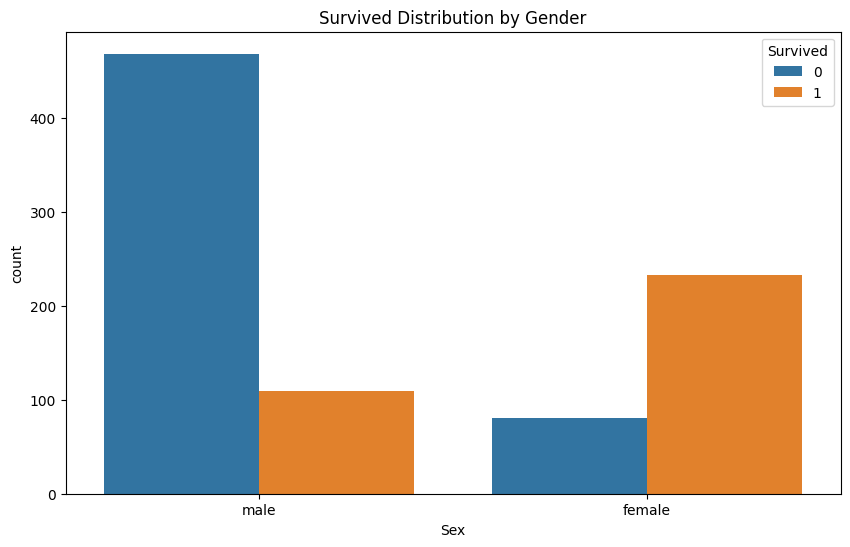

In [112]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survived Distribution by Gender')
plt.show()

# Женщины имеют намного более высокие шансы выжить

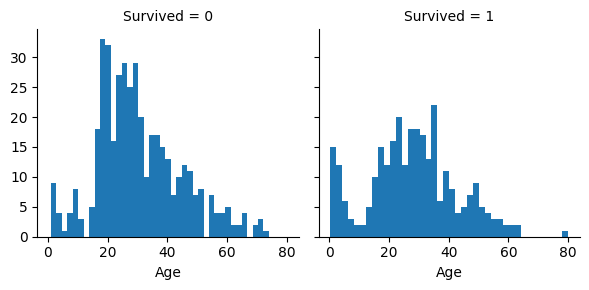

In [113]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=40)

Вероятно, сильно влияет, имеется скачок у детей с 0 лет. 
# Гипотеза: более старые люди имеют меньше шансов выжить из-за худшего здоровья

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [115]:
df = df.drop(columns=['Cabin']) # Убираем из-за слишком большого количества Null

In [116]:
df.fillna({"Age": df['Age'].median()},inplace=True) # заполняем пустые значения медианным

In [117]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,Mr.,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,Mrs.,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,Mrs.,female,35.0,1,0,113803,53.1000,S
4,0,3,Mr.,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,,male,27.0,0,0,211536,13.0000,S
887,1,1,Miss.,female,19.0,0,0,112053,30.0000,S
888,0,3,Miss.,female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,Mr.,male,26.0,0,0,111369,30.0000,C


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [119]:
df['Embarked'].value_counts() 

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [120]:
df.fillna({"Embarked": "S"},inplace=True)

# Заполним поля с пустыми портами отправления самым часты портом

In [121]:
df["FamilySize"] = df["SibSp"] + df["Parch"]

# Новая колонка - вся семья, сумма SibSp и Parch.

Очень высокая корреляция между Family_Size и SibSp, Parch

Уберем SibSp, Parch, так как записали из сумму в Family_Size

In [122]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Кодируем все object'ы к 

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

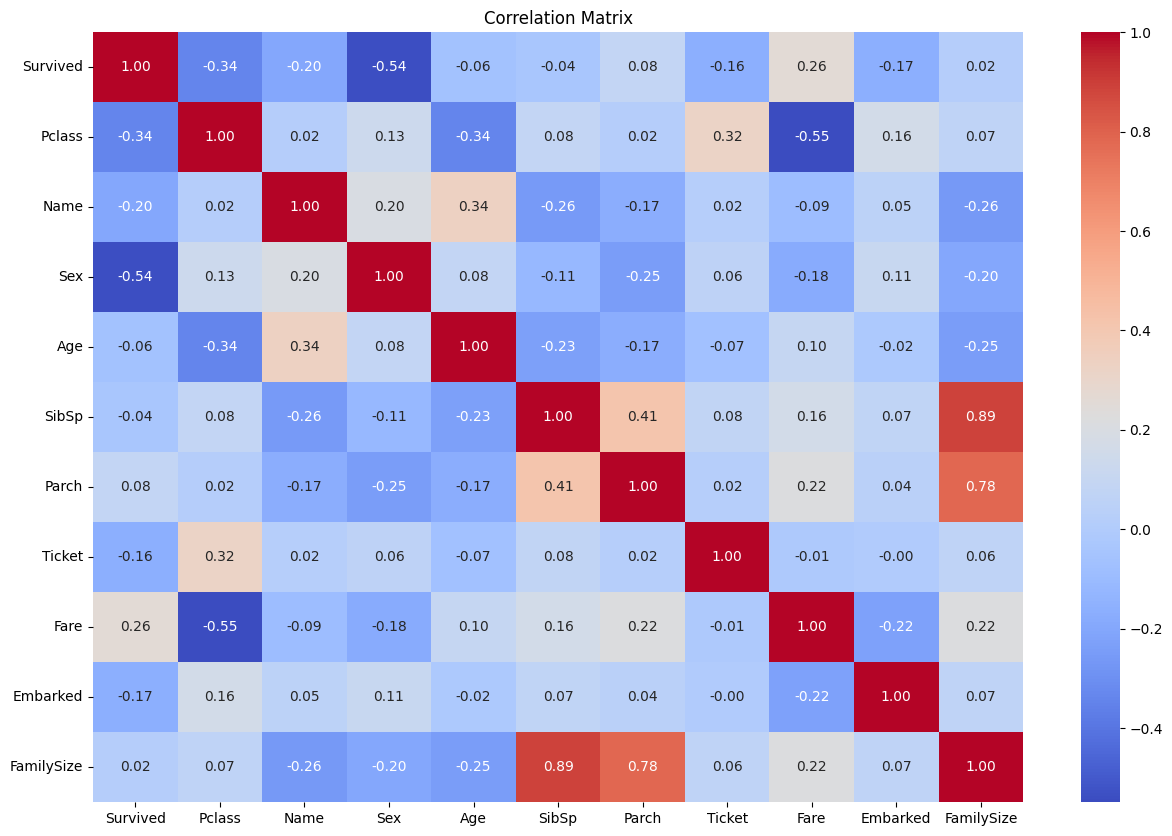

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [125]:
df.drop(['SibSp',"Parch"], axis=1, inplace=True)

# Разбиваем df на тест и тренировку

In [126]:
clf_rf = RandomForestClassifier()
parameters = {"n_estimators": [30,32,35,37,40], "max_depth": [10, 12, 14, 15]}

# Определим важные поля с помощью RandomForestClassifier

In [127]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 5)

In [128]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12, 14, 15],
                         'n_estimators': [30, 32, 35, 37, 40]})

In [129]:
grid_search_cv_clf.best_params_

{'max_depth': 15, 'n_estimators': 30}

In [130]:
grid_search_cv_clf.best_estimator_.feature_importances_

array([0.06400403, 0.1186537 , 0.19306672, 0.15309131, 0.02362986,
       0.02044298, 0.19660093, 0.15953817, 0.02138581, 0.0495865 ])

In [131]:
grid_search_cv_clf.best_estimator_.score(X_test, y_test)

0.8324022346368715

In [132]:
df.corr()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
Survived,1.000000,-0.338481,-0.199253,-0.543351,-0.064910,-0.164549,0.257307,-0.167675,0.016639
Pclass,-0.338481,1.000000,0.015857,0.131900,-0.339898,0.319869,-0.549500,0.162098,0.065997
Name,-0.199253,0.015857,1.000000,0.195611,0.337124,0.019916,-0.094234,0.053828,-0.261075
Sex,-0.543351,0.131900,0.195611,1.000000,0.081163,0.059372,-0.182333,0.108262,-0.200988
Age,-0.064910,-0.339898,0.337124,0.081163,1.000000,-0.070382,0.096688,-0.018754,-0.245619
Ticket,-0.164549,0.319869,0.019916,0.059372,-0.070382,1.000000,-0.013885,-0.001729,0.064302
Fare,0.257307,-0.549500,-0.094234,-0.182333,0.096688,-0.013885,1.000000,-0.224719,0.217138
Embarked,-0.167675,0.162098,0.053828,0.108262,-0.018754,-0.001729,-0.224719,1.000000,0.066516
FamilySize,0.016639,0.065997,-0.261075,-0.200988,-0.245619,0.064302,0.217138,0.066516,1.000000


In [133]:
feature_importance_df = pd.DataFrame({"features":list(X_train),
                                      "feature_importances": grid_search_cv_clf.best_estimator_.feature_importances_})
feature_importance_df.sort_values("feature_importances", ascending=True)

,features,feature_importances
5,Parch,0.020443
8,Embarked,0.021386
4,SibSp,0.023630
9,FamilySize,0.049586
0,Pclass,0.064004
1,Name,0.118654
3,Age,0.153091
7,Fare,0.159538
2,Sex,0.193067
6,Ticket,0.196601


# Попробуем построить RandomForest без Embarked, так как это самые незначительные показатели, а так же мы исключим корреляцию

In [137]:
X = df.drop(columns=['Survived', 'Embarked'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_rf = RandomForestClassifier()
parameters = {"n_estimators": [17,19,21,23], "max_depth": [7,9,10,11]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 17}

In [138]:
grid_search_cv_clf.best_estimator_.feature_importances_

array([0.09619166, 0.08776599, 0.25529099, 0.14644631, 0.17655431,
       0.1751173 , 0.06263343])

In [139]:
grid_search_cv_clf.best_estimator_.score(X_test, y_test)

0.8268156424581006

In [141]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_rf = RandomForestClassifier()
parameters = {"n_estimators": [7,9,11,13], "max_depth": [5,7,9]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 9, 'n_estimators': 11}

In [65]:
grid_search_cv_clf.best_estimator_.score(X_test, y_test)

0.8324022346368715

Итого:
*     С учетом всех столбцов       0.82682
*     'Embarked'                   0.8324

Значения почти одинаковые, это значит, что Embarked незначительно влияет на вероятность выжить

In [143]:
df = df.drop(columns =['Embarked'])
df

KeyError: "['Embarked'] not found in axis"

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6035 - loss: 0.6768 - val_accuracy: 0.6643 - val_loss: 0.6561
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6242 - loss: 0.6537 - val_accuracy: 0.6853 - val_loss: 0.6242
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6810 - loss: 0.6171 - val_accuracy: 0.7133 - val_loss: 0.5956
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7069 - loss: 0.5991 - val_accuracy: 0.7273 - val_loss: 0.5697
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7101 - loss: 0.5846 - val_accuracy: 0.7483 - val_loss: 0.5472
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7458 - loss: 0.5664 - val_accuracy: 0.7413 - val_loss: 0.5278
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7425 - loss: 0.5515 - val_accuracy: 0.7483 - val_loss: 0.5110
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7437 - loss: 0.5353 - val_accuracy: 0.7762 - val_loss: 0.4966


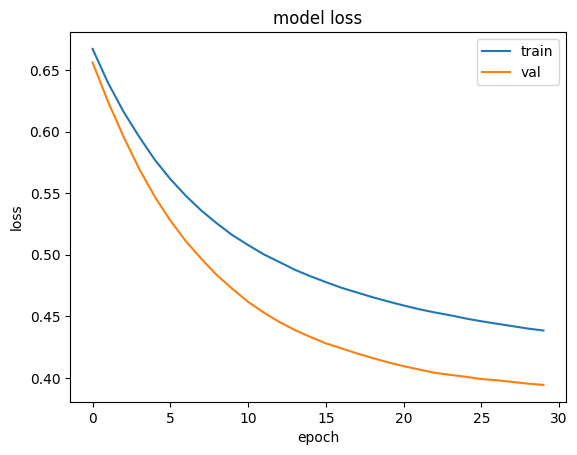

In [149]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
import matplotlib.pyplot as plt



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation = "leaky_relu"))
model.add(Dense(1,activation = 'sigmoid' ))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Несколько моделей сохранены в конце, дальше разбирается лучшая из полученных

In [150]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report


model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation = "leaky_relu"))
model.add(Dense(1,activation = 'sigmoid' ))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)



kf = KFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []
losses = []
X1 = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
for train_index, test_index in kf.split(X):
    
    # Use iloc for integer-based indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    history = model.fit(X_train, y_train, 
                        epochs=30, batch_size=128, 
                        validation_data=(X_test, y_test),
                        verbose=0)
    y_pred = model.predict(X_test)    
    if len(accuracies) == 0 or history.history['val_accuracy'][-1] > max(accuracies):
        best_pred = y_pred
    accuracies.append(history.history['val_accuracy'][-1])
    losses.append(history.history['val_loss'][-1])

    # Create the confusion matrix
    conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)

    # Calculate and print accuracy, precision, recall, F1-score
    print("\nClassification Report:")
    print(classification_report(y_test, (y_pred > 0.5).astype(int)))
best_model_index = np.argmax(accuracies)
print(f"Best model index: {best_model_index}")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(accuracies):.4f}")
print(f"Average Loss: {np.mean(losses):.4f}")
print(f"Standard Deviation of Loss: {np.std(losses):.4f}")

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5710 - loss: 1.4587 - val_accuracy: 0.5245 - val_loss: 1.3026
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5688 - loss: 1.1166 - val_accuracy: 0.6573 - val_loss: 1.0146
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6885 - loss: 0.8774 - val_accuracy: 0.5455 - val_loss: 0.9617
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6307 - loss: 0.8527 - val_accuracy: 0.6783 - val_loss: 0.8340
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6765 - loss: 0.7687 - val_accuracy: 0.6783 - val_loss: 0.7426
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6983 - loss: 0.7427 - val_accuracy: 0.6573 - val_loss: 0.7191
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6672 - loss: 0.6867 - val_accuracy: 0.6993 - val_loss: 0.7148
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6738 - loss: 0.7138 - val_accuracy: 0.6923 - val_loss: 0.6969


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
if len(accuracies) == 0 or history.history['val_accuracy'][-1] > max(accuracies):
    best_pred = y_pred
accuracies.append(history.history['val_accuracy'][-1])
losses.append(history.history['val_loss'][-1])

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy, precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, (y_pred > 0.5).astype(int)))
tn, fp, fn, tp = conf_matrix.ravel()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix:
[[99  6]
 [33 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       105
           1       0.87      0.55      0.68        74

    accuracy                           0.78       179
   macro avg       0.81      0.75      0.76       179
weighted avg       0.80      0.78      0.77       179



In [152]:
dict = classification_report(y_test, (y_pred > 0.5).astype(int), output_dict=True)
print(dict)
print(f"tn: {tn} \nfp: {fp}\nfn: {fn}\ntp: {tp} \n")

{'0': {'precision': 0.75, 'recall': 0.9428571428571428, 'f1-score': 0.8354430379746836, 'support': 105.0}, '1': {'precision': 0.8723404255319149, 'recall': 0.5540540540540541, 'f1-score': 0.6776859504132231, 'support': 74.0}, 'accuracy': 0.7821229050279329, 'macro avg': {'precision': 0.8111702127659575, 'recall': 0.7484555984555985, 'f1-score': 0.7565644941939533, 'support': 179.0}, 'weighted avg': {'precision': 0.800576488767384, 'recall': 0.7821229050279329, 'f1-score': 0.7702250241224596, 'support': 179.0}}
tn: 99 
fp: 6
fn: 33
tp: 41 



# Выводы

В итоге проделанной работы была получена модель, и её анализ. точность на тестовой выборке 0.78.

TP(истинно-положительные) - 99

FP(ложно-положительные) - 6

TN(истинно-отрицательные) - 33

FN(ложно-отрицательные) - 41

Модель показала хороший уровень точности при классификации пассажиров Титаника.
Модель лучше различает выживших (с более высокой пометкой) чем не выживших.
Небольшое количество ложноположительных предсказаний (FP) говорит о низком риске неправильной классификации выживших как погибших.



Но Random Forest показал результат 0.83, что достаточно больше, чтобы считать, что он лучше справился с классификацией.

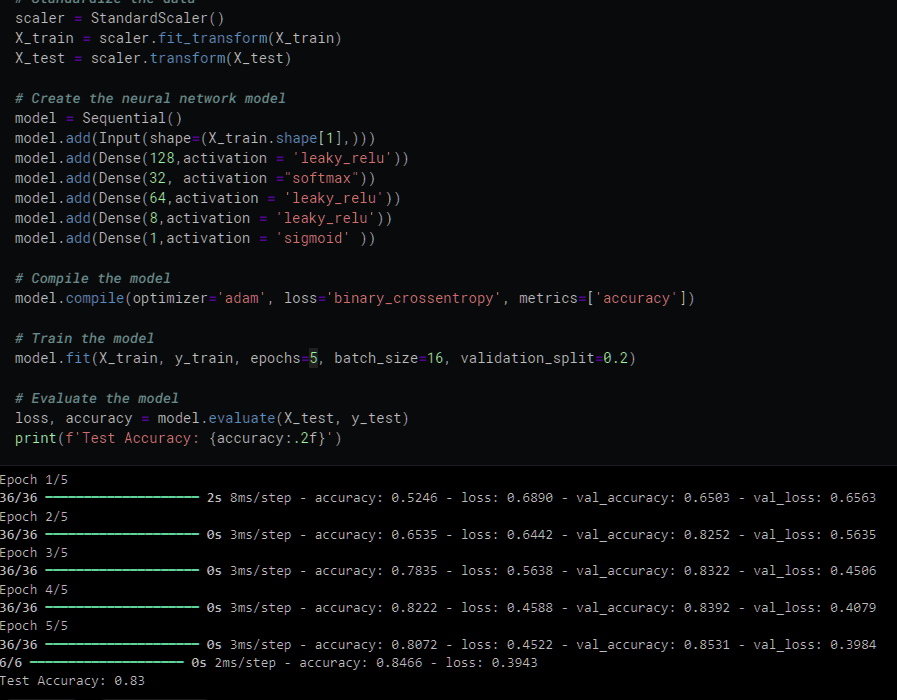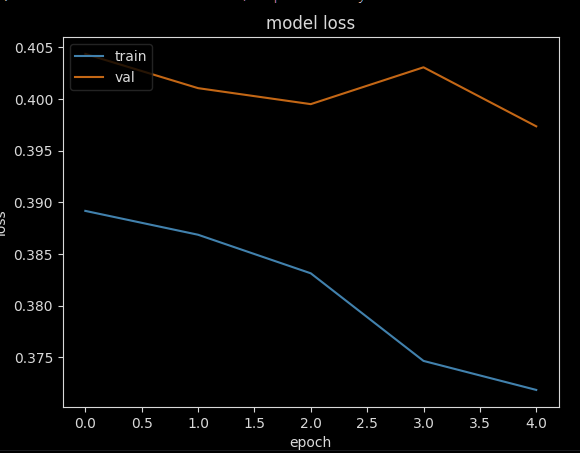

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1,activation = 'sigmoid' ))
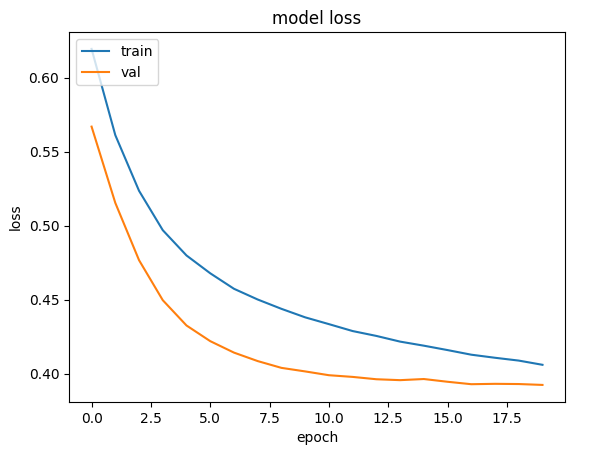

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation = "exponential"))
model.add(Dense(1,activation = 'sigmoid' ))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

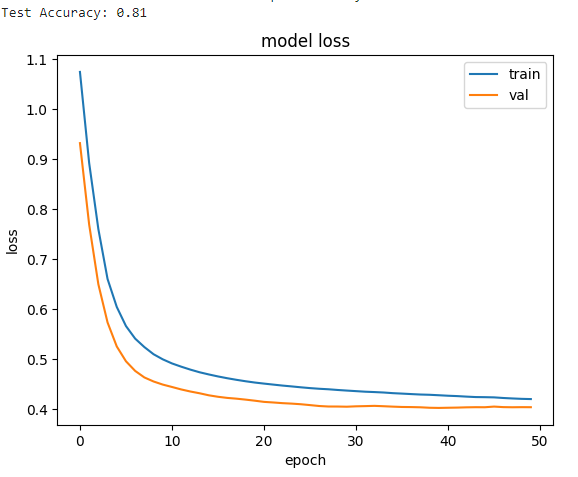